# Importing Dependencies and Libraries

In [11]:
import pandas as pd
import statsmodels.api as sm
from sklearn.model_selection import train_test_split
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import linear_model
import numpy as np

# Importing Data Set

In [12]:
df=pd.read_csv("car_price.csv")
X = df.iloc[:, [3]].values
y = df.iloc[:, [7]].values

# Importing Train/Test/Split

In [13]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test  = train_test_split(X, y, test_size = 0.25, random_state = 42)

# Feature Scaling

In [14]:
from sklearn import preprocessing

scaler = preprocessing.MinMaxScaler().fit(X)
data_scaled = scaler.transform(X)
X_scaled = data_scaled
scaler = preprocessing.MinMaxScaler().fit(y)
data_scaled = scaler.transform(y)
y_scaled = data_scaled

# Implementing K-Fold 10 Fold Cross Validation

In [15]:
from sklearn.model_selection import KFold
from sklearn.linear_model import LinearRegression

kf = KFold(n_splits=10)
i = 1
scores = []
lm = LinearRegression()
for train, test in kf.split(X_scaled):
    print("Fold: {}".format(i))
    X_train, X_test, y_train, y_test = X_scaled[train], X_scaled[test], y_scaled[train], y_scaled[test]
    lm.fit(X_train,y_train)
    score = lm.score(X_test, y_test)
    scores.append(score)
    print(f"Accuracy for the fold no. {i} on the test set: {score}%")
    i += 1


Fold: 1
Accuracy for the fold no. 1 on the test set: -27.587370995938425%
Fold: 2
Accuracy for the fold no. 2 on the test set: -103.45025222056745%
Fold: 3
Accuracy for the fold no. 3 on the test set: -220.5478124559737%
Fold: 4
Accuracy for the fold no. 4 on the test set: -44.47976530372815%
Fold: 5
Accuracy for the fold no. 5 on the test set: -25.258964581657533%
Fold: 6
Accuracy for the fold no. 6 on the test set: -10.416614394040977%
Fold: 7
Accuracy for the fold no. 7 on the test set: -18.545481928209917%
Fold: 8
Accuracy for the fold no. 8 on the test set: -32.18366872781094%
Fold: 9
Accuracy for the fold no. 9 on the test set: -25.897237818205166%
Fold: 10
Accuracy for the fold no. 10 on the test set: -7.5398038908031015%


Fitting The Model into Dataset

In [16]:
y_pred = lm.predict(X_test)

# Predicting the Linear Regression using Cross Validation and Plotting the Result

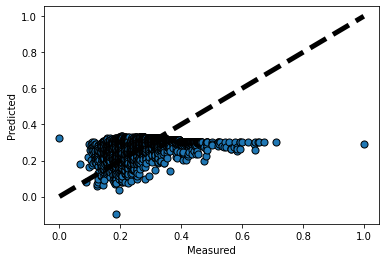

In [17]:
from sklearn.model_selection import cross_val_predict

lr = LinearRegression()
predicted = cross_val_predict(lr, X_scaled, y_scaled, cv=10)

fig, ax = plt.subplots()
ax.scatter(y_scaled, predicted, edgecolors=(0, 0, 0), s=50)
ax.plot([y_scaled.min(), y_scaled.max()], [y_scaled.min(), y_scaled.max()], 'k--', lw=5)
ax.set_xlabel('Measured')
ax.set_ylabel('Predicted')
plt.show()

# Printing the Scoring Metrics for the Linear Regression Model

In [19]:
from sklearn.model_selection import cross_val_score
from numpy import mean, std
from sklearn import metrics

linreg = LinearRegression()
scores = cross_val_score(linreg, X_scaled, y_scaled, cv=10, scoring="r2")

mae = metrics.mean_absolute_error(y_test,y_pred)
rmse = np.sqrt(metrics.mean_squared_error(y_test,y_pred))
print(scores)
print('The Accuracy of the K-Fold 10 Cross Validation: {} '.format(std(scores)))

print('The Root Mean Squared Error is: ', rmse )
print('The Mean Absolute Error is: ', mae )

[ -27.587371   -103.45025222 -220.54781246  -44.4797653   -25.25896458
  -10.41661439  -18.54548193  -32.18366873  -25.89723782   -7.53980389]
The Accuracy of the K-Fold 10 Cross Validation: 61.9036061665724 
The Root Mean Squared Error is:  0.15288401460414708
The Mean Absolute Error is:  0.1420974223582017


In [27]:
# df_pred = pd.DataFrame({'Predicted value': [y_pred], 'Real Value': [y_test]})
# df_pred

,Predicted value,Real Value
0,"[[0.3018901262275625], [0.2983948631072976], [...","[[0.39438124443565137], [0.39440102878623007],..."
